   visual_score  auditory_score  kinesthetic_score  cluster
0      8.000301        1.389837           9.686887        1
1      8.401052        7.294055           4.853655        0
2      9.124874        3.975049           6.688173        1
3      5.724100        7.702631           7.535001        0
4      5.060739        4.711628           4.302653        2


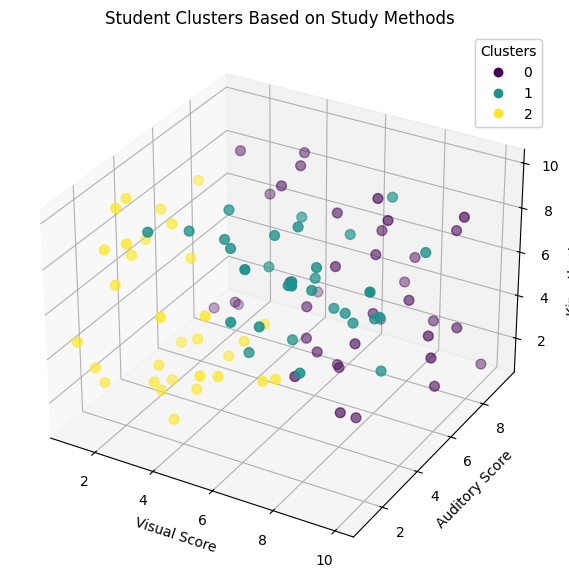

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the dataset
df = pd.read_csv("/content/student_methods.csv")

# Extract features
X = df[['visual_score', 'auditory_score', 'kinesthetic_score']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Print the first few rows with cluster labels
print(df[['visual_score', 'auditory_score', 'kinesthetic_score', 'cluster']].head())

# 3D Scatter plot of the clusters
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['visual_score'], df['auditory_score'], df['kinesthetic_score'],
                     c=df['cluster'], cmap='viridis', s=50)

ax.set_xlabel('Visual Score')
ax.set_ylabel('Auditory Score')
ax.set_zlabel('Kinesthetic Score')
ax.set_title('Student Clusters Based on Study Methods')
legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)
plt.show()
